<a href="https://colab.research.google.com/github/kecosz/rELA/blob/main/rELA0_2_tutorial_052723.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparation
### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### rpy2 version specification
Required to successfully execute "%load_ext rpy2.ipython" as of 2023/1

In [ ]:
!pip install rpy2==3.5.1
#!pip install --upgrade ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318098 sha256=e614e8852c86bfc34e3863e70215294217049d06e98445e8e79d8123fae791fb
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [ ]:
%load_ext rpy2.ipython

### Installing packages

In [ ]:
# This Python code is just for not showing rpy2 messages related to R package installation on google colab
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import logging
rpy2_logger.setLevel(logging.ERROR)   # will display errors, but not warnings

In [ ]:
%%R
install.packages("Rcpp")
install.packages("RcppArmadillo")
install.packages("doParallel")
install.packages('tidyverse')
install.packages('gsubfn')
install.packages('zoo')
install.packages('snow')
install.packages('plyr')
install.packages('gtools')
install.packages('ggsci')
install.packages('igraph')
install.packages('tidygraph')
install.packages('RColorBrewer')
#install.packages('scatterpie') <- Commented out because of an error.
library("Rcpp")
library("RcppArmadillo")
library("doParallel")
library('tidyverse')
library('gsubfn')
library('zoo')
library('snow')
library('plyr')
library('gtools')
library('ggsci')
library('igraph')
library('tidygraph')
library('RColorBrewer')
#library('scatterpie')

### Download and install rELA package

In [ ]:
!git clone https://github.com/kecosz/rELA.git

Cloning into 'rELA'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 37 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), 3.59 MiB | 6.23 MiB/s, done.


In [ ]:
%%R
install.packages("rELA/rELA.v0.21.tar.gz")
library("rELA")

## Energy Landscape Analysis

### Download data

In [ ]:
%%R
# Specify the path for your own data in the code below, if necessary.
baseabtable <- read.csv('drive/MyDrive/data/abundance_table.csv', sep=',', fileEncoding='utf-8') %>%
  column_to_rownames(., var = "X")
basemetadata <- read.csv('drive/MyDrive/data/sample_metadata.csv', sep=',', fileEncoding='utf-8') %>%
  column_to_rownames(., var = "X")

In [ ]:
%%R
head(baseabtable, 7)

         species.1 species.2 species.3 species.4 species.5 species.6 species.7
sample.1      2384         0      1313      8218         0      3529         0
sample.2     10343         0      2201      6814         0      2887         0
sample.3      4473         0       614      2046      4455      3429         0
sample.4      8786         0      5517       328         0        15         0
sample.5     10640         0      2321      6652         0      2642         0
sample.6         0         0       165      7794      1697      3816         0
sample.7      8801         0      2204      4853         0      5526         0
         species.8 species.9 species.10 species.11 species.12 species.13
sample.1         0      3938        120       4156          0       3223
sample.2      6944      4907          0          0          0          0
sample.3      1503      8319          0          0          0      10433
sample.4      5372     10032       1722          0          0       5001
sam

In [ ]:
%%R
head(basemetadata, 7)

         factor.1   factor.2
sample.1    -0.92 2.79692115
sample.2     0.34 2.14701252
sample.3    -0.92 1.60611363
sample.4    -0.24 0.58476465
sample.5     0.40 1.73161379
sample.6    -0.82 2.95971753
sample.7     0.36 0.07787331


In [ ]:
%%R
list[ocvecs, abvecs, envecs, samplelabel, specieslabel, factorlabel] <-
  Formatting(baseabtable, basemetadata, 1, c(0.05, 0.05, 0.95))


Processed 256 samples.
Relative abundance threshold = 0.05 
Occurrence threshold (lower) = 0.05 
Occurrence threshold (upper) = 0.95 
Selected  16  out of  256 species.


`Formatting`  The **first** and **second arguments** are the frequency table and metadata loaded above. The **third argument** is whether or not to normalize the abundances within the sample; 0 for without normalization, 1 for normalization. The **fourth argument** is a vector of threshold values,  and it contains a threshold for converting abundance to presence/absence status, a lower and upper bound of the mean occurence of species in all samples (any species with a mean occurence less than or greater than these value are removed).  
  
Formatting returns six objects. Here, we assigned the following variable names to them:
1.	ocvecs: presence(1)/absence(0) status of each species in each sample
2.	abvecs: abundance of each species before converting to the presence/absence status
3.	envecs: value of environmental factors for each sample
4.	samplelabel: list of sample names
5.	specieslabel: list of species names
6.	factorlabel: list of environmental factors

In [ ]:
%%R
head(ocvecs, 7)

           species.1 species.2 species.3 species.4 species.5 species.6
sample.1           1         0         1         1         0         1
sample.10          1         0         1         1         0         0
sample.100         1         1         1         0         1         1
sample.101         1         0         0         1         0         1
sample.102         1         0         0         1         0         1
sample.103         1         0         0         1         1         1
sample.104         1         0         1         1         0         1
           species.7 species.8 species.9 species.10 species.11 species.12
sample.1           0         0         1          1          1          0
sample.10          0         1         1          0          0          0
sample.100         0         1         1          1          0          0
sample.101         0         1         1          0          0          0
sample.102         0         0         1          1          0

### Parameter fitting

In [ ]:
%%R
#runSA: ocmatrix, env (environmental parameters; with>SA / without>fullSA), qth (threshold for stopping computation), rep (number of fitting processes to compute mean parameter value), threads (number of parallel threads)

sa <- runSA(data=as.matrix(ocvecs), qth=10^-5, rep=256, threads=1)


Start parameter fitting

Done ; elapsed time 36.82 sec



`runSA` The **first argument (data)** is the presence/absence data; the **second argument (env)** specifies the environmental factor for each sample, which is skipped for analyses that do not consider environmental conditions; the **third argument (qth)** is the threshold for determining parameter convergence; the **fourth argument (par)** is the number of parallel processes, where the average of the specified number of processes is used; and the **fifth argument (threads)** is the number of threads used in the calculation. It is recommended to try `threads=1` first and see if increasing the number of threads speeds up the execution.

In [ ]:
%%R
list[he,je,ge,hge] <- sa2params(sa)

In [ ]:
%%R
he

 species.1  species.2  species.3  species.4  species.5  species.6  species.7 
 2.4976518 -1.2003595  1.0745972  1.6756127 -1.2213547  0.6886837 -1.2354324 
 species.8  species.9 species.10 species.11 species.12 species.13 species.14 
 0.2082262  2.7683666 -0.9577528 -2.6340950 -1.8622155  0.1078539  1.0088123 
species.15 species.16 
-1.3307458 -1.1559877 


In [ ]:
%%R
hge

 species.1  species.2  species.3  species.4  species.5  species.6  species.7 
 2.4976518 -1.2003595  1.0745972  1.6756127 -1.2213547  0.6886837 -1.2354324 
 species.8  species.9 species.10 species.11 species.12 species.13 species.14 
 0.2082262  2.7683666 -0.9577528 -2.6340950 -1.8622155  0.1078539  1.0088123 
species.15 species.16 
-1.3307458 -1.1559877 


### Analysis and visualization of energy landscape
#### ELA function

In [ ]:
%%R
elanp <- ELA(sa, env=NULL,
                SS.itr=20000, FindingTip.itr=10000, # <- the number of steps for finding stable states and tipping points (basically no need to change)
                threads=1, reporting=TRUE)
ela <- ELPruning(elanp, th=0.08)

Elapsed time 1.02 sec


`ELA` The **first argument** is the return value of `runSA` as it is; the **second argument** is the environment factor of the sample, which need not be given if it is not given in runSA; the **third** and **fourth arguments** are the number of iterations to find stable states and tipping points, respectively, and should basically remain unchanged. The **fifth argument** is the number of threads used in the calculation and the **sixth argument** should be TRUE to output the calculation time.  
  
`ELPruning` is a function to prune an energy landscape, which prunes basins shallower than 100*`th`% of the deepest basin.

From the return value of `ELA`, the information on the stable states and tipping points can be retrieved as follows:

In [ ]:
%%R
list[stablestates, stablen, tippingpoints, tippingen] <- ela[[1]]

stable states

In [ ]:
%%R
stablestates

[1] 46468 38092 58001


Convert an integer representing a stable state (ssid) to a binary vector

In [ ]:
%%R
# ssid -> binary vector
bin = as.list(sapply(stablestates, function(x){CIntegerDigits(x, length(colnames(ocvecs)))}))
bin

$dec2bin.ssid..n.
 [1] 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0

$dec2bin.ssid..n.
 [1] 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0

$dec2bin.ssid..n.
 [1] 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1



Convert a binary vector to a ssid

In [ ]:
%%R
# binary vector -> ssid
as.vector(sapply(bin, function(x){str2i(paste(unlist(applyvec(x, as.character)), collapse=''))}))

[1] 46468 38092 58001


Table of SSID, Energy, Community composition

In [ ]:
%%R
sstable <- as.data.frame(cbind(stablestates, stablen, t(as.data.frame(bin)))) %>%
  'colnames<-'(c('ID', 'Energy', colnames(ocvecs))) %>%
  'rownames<-'(1: length(stablestates))
sstable

     ID    Energy species.1 species.2 species.3 species.4 species.5 species.6
1 46468 -14.19717         1         0         1         1         0         1
2 38092 -13.11923         1         0         0         1         0         1
3 58001 -11.98866         1         1         1         0         0         0
  species.7 species.8 species.9 species.10 species.11 species.12 species.13
1         0         1         1          0          0          0          0
2         0         0         1          1          0          0          1
3         1         0         1          0          0          1          0
  species.14 species.15 species.16
1          1          0          0
2          1          0          0
3          0          0          1


Export the table to Google Drive in CSV format

In [ ]:
%%R
write.csv(x = sstable, file="drive/MyDrive/colab_export/sstable.csv") # "sstable.csv" is saved in "colab_export" folder of your Google Drive.

ID and energy of tipping points

In [ ]:
%%R
as.data.frame(tippingpoints)

   X1    X2    X3
1 Inf 38028 41857
2 Inf   Inf 58056
3 Inf   Inf   Inf


In [ ]:
%%R
as.data.frame(tippingen)

   X1        X2        X3
1 Inf -12.62654 -8.723767
2 Inf       Inf -7.592255
3 Inf       Inf       Inf


Energy of any community composition


In [ ]:
%%R
x <- replace(rep(0,length(ocvecs[1,])),10,1)
cEnergy(x, he, je)

[1] 0.9577528


Find the stable state for a community composition

In [ ]:
%%R
x <- replace(rep(0,length(ocvecs[1,])),10,1)
Bi(x, he, je)

[[1]]
[1] 38092

[[2]]
[1] -13.11923



### Principal component analysis  
Observed community compositions plotted on a PC1,2 plane and color-coded by their stable states

NULL


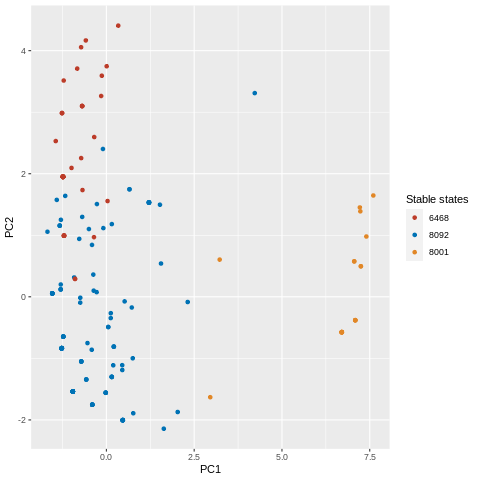

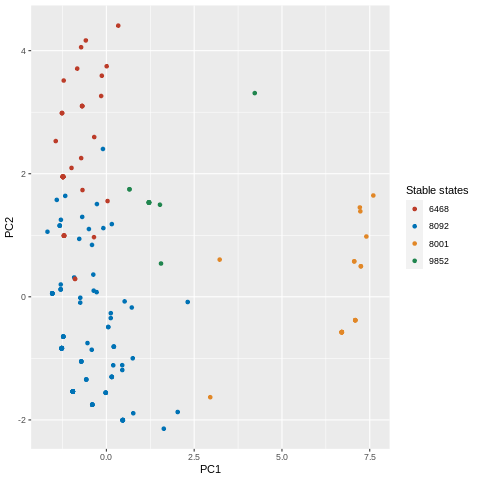

In [ ]:
%%R
PCplot(ocvecs, sa, ssrep=ela[[2]])
PCplot(ocvecs, sa, ssrep=ela[[2]], pruned=FALSE)

Disconnectivity graph


[1] 46468 38092 58001
NULL


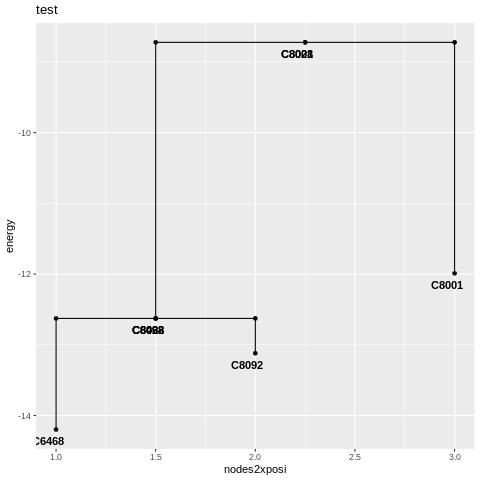

In [ ]:
%%R
showDG(ela[[1]], ocvecs, "test")

### Visualization of species' interaction

NULL


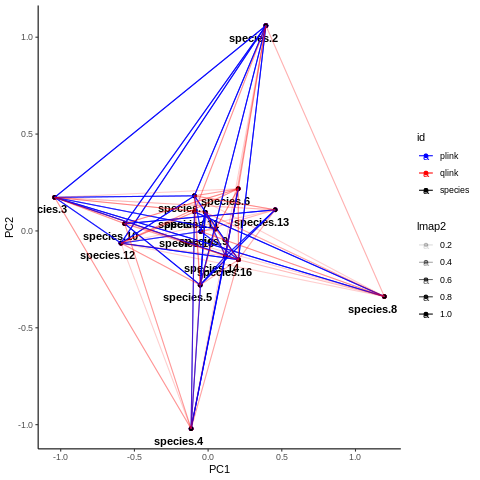

In [ ]:
%%R
showIntrGraph(ela[[1]], je, th=0.4, # <- Threshold for links to be displayed
              annot_adj=c(0.75, 2.00))

### Energy landscape analysis with environmental gradients

In [ ]:
# Parameter fitting including environmental parameters
%%R
sa <- runSA(data=as.matrix(ocvecs), env=as.matrix(envecs), qth=10^-5, rep=256, threads=1)

Start parameter fitting

Done ; elapsed time 45.73 sec



In [ ]:
%%R
colnames(envecs)

[1] "factor.1" "factor.2"


In [ ]:
%%R
gela <- GradELA(sa=sa, eid="factor.1", # Specify the label or position of an environmental factor
  env=envecs, refenv=NULL, steps=32, prn=0.05, threads=1) #[[1]]: return value of ELA function for each step, [[2]]: value of environmental factor for each step, [[3]]: specified environmental factor

refenv not specified, the mean of envecs is used
processing(32) |================================|
Elapsed time 25.72 sec


[1] 38092 58001 59852
NULL


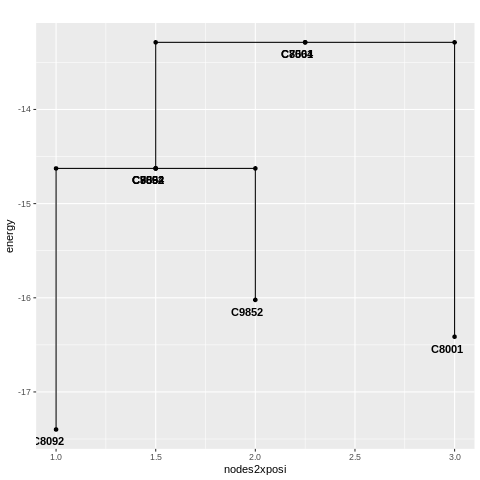

In [ ]:
# Disconnectivity graph
%%R
showDG(gela[[1]][[1]][[1]], ocvecs)

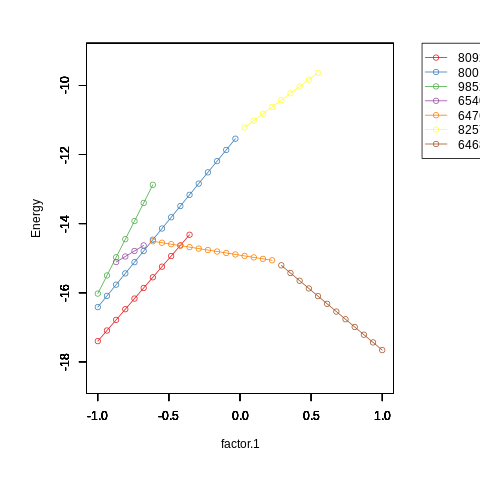

In [ ]:
# Stable state diagram
%%R
showSSD(gela)

In [ ]:
# SSentropy and energy gap
%%R
stability(sa, unique(ocvecs))

           energy.gap  ssentropy
sample.1    8.9671967 0.00000000
sample.10   0.9158027 0.33140182
sample.100 10.1532998 0.50292491
sample.101  0.8818626 0.13578841
sample.102  2.3172697 0.61976044
sample.103  4.0470881 0.08079314
sample.104  0.0000000 0.00000000
sample.105  7.7786472 0.47843387
sample.106  0.4904694 0.00000000
sample.107  1.0838180 0.00000000
sample.108  2.0042856 0.00000000
sample.11   6.1565129 0.53792323
sample.110  0.2012274 0.65310911
sample.114  6.8900654 0.49689227
sample.119  5.2867453 0.43312311
sample.12   5.0249238 0.00000000
sample.121  6.7242997 0.00000000
sample.123  2.5013257 0.18426059
sample.124  3.4048777 0.00000000
sample.125  5.1308705 0.31945397
sample.126 11.3498108 0.22836403
sample.129  6.0578808 0.00000000
sample.132  6.9473613 0.19938228
sample.138  5.7407132 0.00000000
sample.139  2.8232056 0.00000000
sample.140  1.6382918 0.28213375
sample.143  9.2751378 0.00000000
sample.150  7.0744250 0.00000000
sample.152  3.2039855 0.00000000
sample.153